# Reinforcement Learning in Mario - Tutorial

This tutorial will gude you through the setup process for the Mario Environment and Stablebaselines library

## First steps

- Create a conda virtual environment with Python 3.9
    - Make sure you have anaconda installed in your computer - (Conda Installation)[https://conda.io/projects/conda/en/latest/user-guide/install/index.html]
    -  Open the Conda console and use the following line to create the virtual environment: 
        ```console
        conda create --name my_environment python=3.9
        conda activate my_environment
        ```
        *Note the new environment only has Python, we will install the dependencies along the way to detect potential compatibility issues.

- Setup the VScode IDE to run Python from the new environment
    - Open the command palette, use the following shortcut: Control + Shift + P or under the menu "view."
    - Type in the textbox "select interpreter" and choose the python from the new virtual environment.
    - For further information about this process, follow the link: (Python environments in VS Code)[https://code.visualstudio.com/docs/python/environments]

- As next step, please create a private repository in GitHub and share it with (@dccartagena)[https://github.com/dccartagena]. Then clone it in your computer and save everything there. 
    - If you are not familiar with GitHub, I recommend you to use the visual interface to pull/push/fetch changes in your code: (GitHub Desktop)[https://desktop.github.com/]

- Now, let us proceed to create a Jupyter notebook or python file, e.g. mario_saferl.ipynb or mario_saferl.py

## Installing The Mario Environment

- Make sure you are working in the virtual environment. You may check it on the Conda console.
- Run the following commands in the Conda console:

    ```console 
    pip install --user wheel==0.38.0 pip install setuptools==65.5.0 
    pip install stable-baselines3==1.8.0
    pip install nes-py
    pip install gym-super-mario-bros
    pip install opencv-python
    ```
    - In case you face a compatibility issue with nes-py, chances are that the C++ distribution in your pc is not compatible. Thus, follow the instruction in the first comment of this Stackoverflow question: (How to solve "error: Microsoft Visual C++ 14.0 or greater is required" when installing Python packages?)[https://stackoverflow.com/questions/64261546/how-to-solve-error-microsoft-visual-c-14-0-or-greater-is-required-when-inst]
        - Go to the control panel in your pc and under the *"Install/Uninstall Apps,"* search for the program *"Visual Studio Build Tools,"* then click in **Modify** the installation. 
        - Then, use the installation wizard to update the C++ distribution in your machine.

Note we will work with deprecated libraries due to the gym-super-mario-bros environment.

## Let Us Create A Random Agent

In [1]:
# Import libraries

from PIL import Image           # Image management
import numpy as np              # Numerical computing
import matplotlib.pyplot as plt # Plotting

from nes_py.wrappers import JoypadSpace     # Joypad wrapper in NES Emulator

import gym_super_mario_bros                                 # Super Mario environment
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT    # Import the simplified controls

In [2]:
# Create environment - Note there are different environments, for more info: https://pypi.org/project/gym-super-mario-bros/
env = gym_super_mario_bros.make("SuperMarioBros-v2")

# Setup simplified controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)

# actions for simple movement
# SIMPLE_MOVEMENT = [
#     ['NOOP'],
#     ['right'],
#     ['right', 'A'],
#     ['right', 'B'],
#     ['right', 'A', 'B'],
#     ['A'],
#     ['left'],
# ]

In [3]:
# Let us explore the space and action space in this environment

# Reset environment
env.reset()

# Sample one random action
action = env.action_space.sample()

# One agent-environment iteration 
next_state, reward, done, info = env.step(action)

# Print results
print('The shape of the states is {}'.format(next_state.shape))

print('The reward for this iteration is {}'.format(reward))

print('The done flag in this iteration is {}'.format(done))

print('Here is more information about this iteration {}'.format(info))

The shape of the states is (240, 256, 3)
The reward for this iteration is 0.0
The done flag in this iteration is False
Here is more information about this iteration {'coins': 0, 'flag_get': False, 'life': 2, 'score': 0, 'stage': 1, 'status': 'small', 'time': 400, 'world': 1, 'x_pos': 40, 'y_pos': 79}


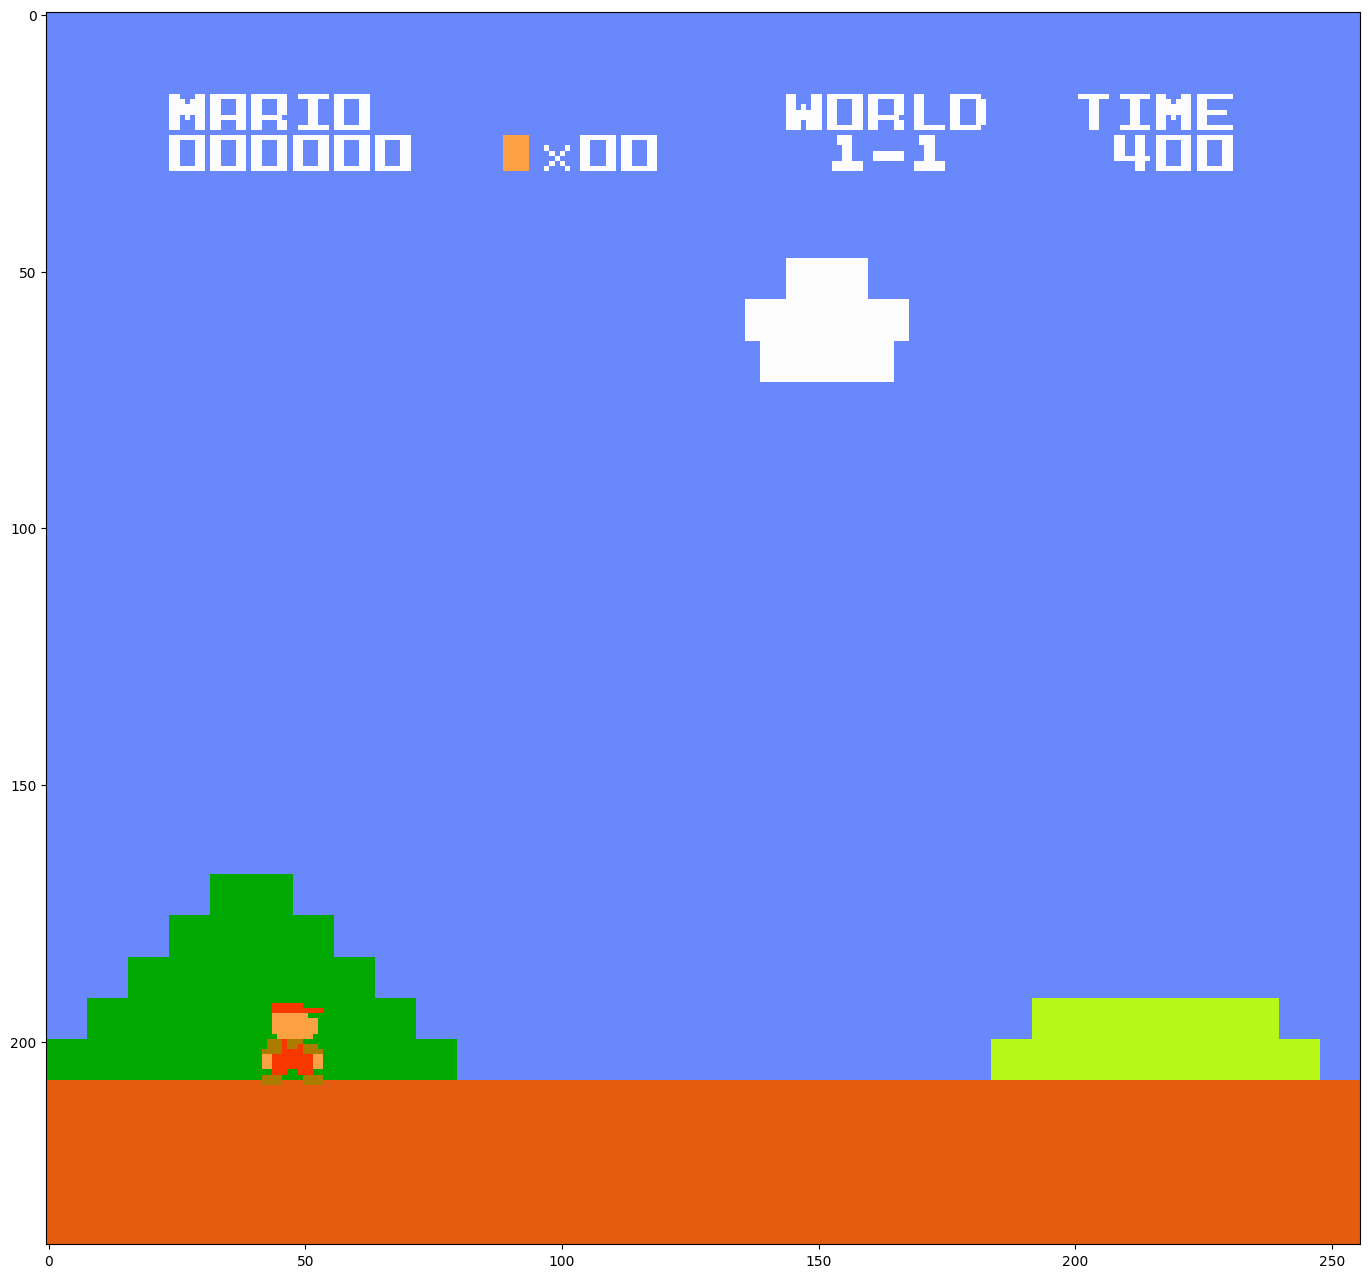

In [4]:
# Plot next state
plt.figure(figsize=(20, 16))
plt.imshow(next_state)

In [5]:
# Random Agent Loop

# Done flag - Termination of episode
done = True

# Number of iterations
num_iterations = 100

# Iteration loop
for steps in range(num_iterations):
    
    # Check if the episode is done
    if done:
        env.reset()
    
    # Sample one random action
    action = env.action_space.sample()
    
    # agent-environment iteration 
    next_state, reward, done, info = env.step(action)
    
    # Render may crash Jupyter
    env.render()
    
    # Check for new reward
    print('The reward in step {} is {}'.format(steps, reward))
    
# Close the environment        
env.close()

The reward in step 0 is 0.0
The reward in step 1 is 0.0
The reward in step 2 is 0.0
The reward in step 3 is 0.0
The reward in step 4 is 0.0
The reward in step 5 is 1.0
The reward in step 6 is 0.0
The reward in step 7 is 0.0
The reward in step 8 is 1.0
The reward in step 9 is 0.0
The reward in step 10 is 1.0
The reward in step 11 is 0.0
The reward in step 12 is 1.0
The reward in step 13 is 0.0
The reward in step 14 is 1.0
The reward in step 15 is 1.0
The reward in step 16 is 1.0
The reward in step 17 is 0.0
The reward in step 18 is 0.0
The reward in step 19 is 1.0
The reward in step 20 is 1.0
The reward in step 21 is 1.0
The reward in step 22 is 1.0
The reward in step 23 is 1.0
The reward in step 24 is 1.0
The reward in step 25 is 1.0
The reward in step 26 is 1.0
The reward in step 27 is 1.0
The reward in step 28 is 1.0
The reward in step 29 is 2.0
The reward in step 30 is 1.0
The reward in step 31 is 1.0
The reward in step 32 is 1.0
The reward in step 33 is 1.0
The reward in step 34 is

# Let Us Create An RL agent

In [3]:
# Wrappers to vectorize and stack frames
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

# RL algorithms in the library
from stable_baselines3 import DQN, A2C, DDPG, PPO, SAC, TD3

# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation

In [4]:
# Use the wrappers

# Grayscale
env = GrayScaleObservation(env, keep_dim=True)

# Vectorize environment - call the environment in sequence on the current Python process
env =  DummyVecEnv([lambda: env])

# Stack frames
env = VecFrameStack(env, n_stack = 4, channels_order='last')

In [5]:
# Explore the new environment

# Reset environment
env.reset()

# Sample one random action
action = env.action_space.sample()

# One agent-environment iteration 
next_state, reward, done, info = env.step([5])

# Print results
print('The shape of the states is {}'.format(next_state.shape))

print('The reward for this iteration is {}'.format(reward))

print('The done flag in this iteration is {}'.format(done))

print('Here is more information about this iteration {}'.format(info))

ImportError: DLL load failed while importing cv2: The specified module could not be found.

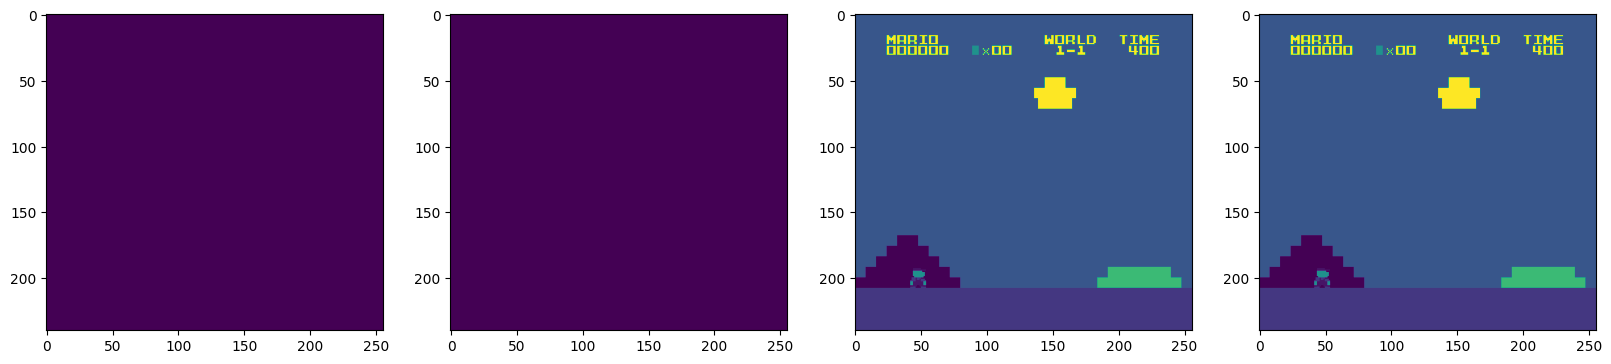

In [9]:
# Visualize the new state, i.e, past 4 frames
plt.figure(figsize=(20,16))
for idx in range(next_state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(next_state[0][:,:,idx])
plt.show()

In [5]:
# Create and train a model
model = PPO(policy = 'CnnPolicy', env = env, verbose = 1)
model.learn(total_timesteps = 1000)

Using cpu device
Wrapping the env in a VecTransposeImage.


ModuleNotFoundError: No module named 'cv2'

In [11]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

KeyboardInterrupt: 